## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [3]:
import os
import keras
import itertools
import warnings
warnings.filterwarnings('ignore')
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
        
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75, 1]


In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp_rate in Dropout_EXP:
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_rate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)


    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["acc"]
    
    exp_name_tag = "exp-dropout-%s" % str(drp_rate)
    results[exp_name_tag] ={"train-loss": train_loss,
                            "valid-loss": valid_loss,
                            "train-acc":train_acc,
                            "valid-acc":valid_acc}
    









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______

50000/50000 [==============================] - 3s 67us/step - loss: 1.5253 - acc: 0.4532 - val_loss: 1.4800 - val_acc: 0.4752
Epoch 38/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.5233 - acc: 0.4522 - val_loss: 1.4833 - val_acc: 0.4752
Epoch 39/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.5170 - acc: 0.4531 - val_loss: 1.4896 - val_acc: 0.4774
Epoch 40/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5135 - acc: 0.4556 - val_loss: 1.5045 - val_acc: 0.4653
Epoch 41/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5134 - acc: 0.4558 - val_loss: 1.4958 - val_acc: 0.4677
Epoch 42/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5095 - acc: 0.4568 - val_loss: 1.4756 - val_acc: 0.4750
Epoch 43/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.5040 - acc: 0.4591 - val_loss: 1.4827 - val_acc: 0.4686
Epoch 44/50
50000/50000 [=====================

Epoch 36/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.9958 - acc: 0.2452 - val_loss: 2.1053 - val_acc: 0.2306
Epoch 37/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.0037 - acc: 0.2416 - val_loss: 2.0244 - val_acc: 0.2577
Epoch 38/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.9932 - acc: 0.2478 - val_loss: 2.0960 - val_acc: 0.2375
Epoch 39/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.9939 - acc: 0.2457 - val_loss: 2.0715 - val_acc: 0.2531
Epoch 40/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9884 - acc: 0.2502 - val_loss: 2.0379 - val_acc: 0.2653
Epoch 41/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.9912 - acc: 0.2483 - val_loss: 2.0608 - val_acc: 0.2515
Epoch 42/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9896 - acc: 0.2492 - val_loss: 2.0685 - val_acc: 0.2557
Epoch 43/50
50000/50000 [=========

50000/50000 [==============================] - 4s 72us/step - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - acc: 0.0955 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 4s 71us/step - loss: 2.3027 - acc: 0.0957 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 4s 77us/step - loss: 2.3027 - acc: 0.0966 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 4s 78us/step - loss: 2.3028 - acc: 0.1007 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 38/50
50000/50000 [=====================

Epoch 30/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.9338 - acc: 0.6667 - val_loss: 1.4477 - val_acc: 0.5260
Epoch 31/50
50000/50000 [==============================] - 4s 71us/step - loss: 0.9202 - acc: 0.6705 - val_loss: 1.4341 - val_acc: 0.5394
Epoch 32/50
50000/50000 [==============================] - 4s 70us/step - loss: 0.8951 - acc: 0.6804 - val_loss: 1.4837 - val_acc: 0.5201
Epoch 33/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.8856 - acc: 0.6823 - val_loss: 1.4731 - val_acc: 0.5268
Epoch 34/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.8643 - acc: 0.6897 - val_loss: 1.4921 - val_acc: 0.5233
Epoch 35/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.8481 - acc: 0.6960 - val_loss: 1.5030 - val_acc: 0.5239
Epoch 36/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.8332 - acc: 0.7007 - val_loss: 1.5292 - val_acc: 0.5195
Epoch 37/50
50000/50000 [=========

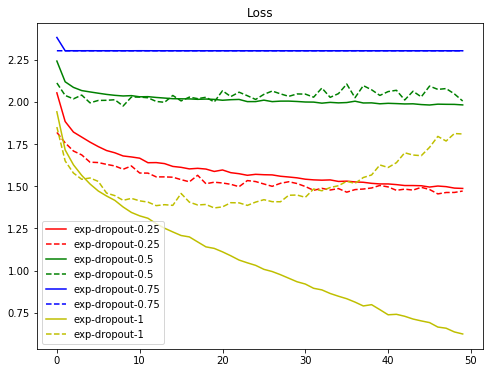

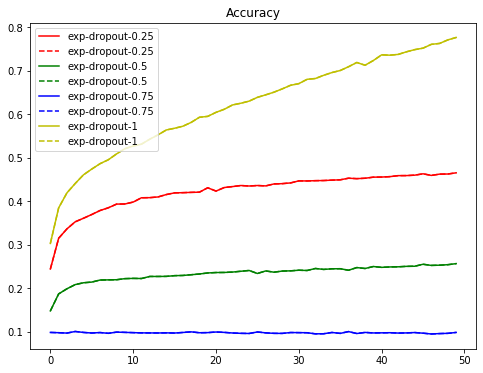

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bars = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bars[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bars[i])
plt.title("Loss")
plt.legend()
plt.show()


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bars[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bars[i])
plt.title("Accuracy")
plt.legend()
plt.show()



